### Problem statement - 

Collect all the descriptions happening at opportunity level. Use that
description to predict whether we will win the case or not.

### Models Performance

Text(0.5, 1.0, 'Scores of Models')

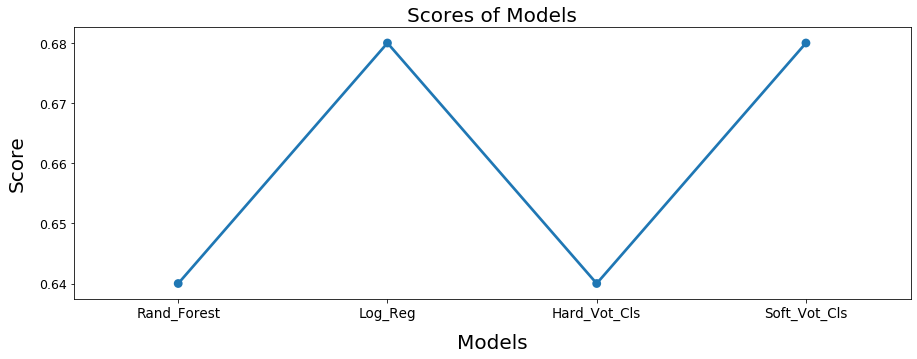

In [50]:
# Ploting the model performance with the line plot

plt.figure(figsize = (15, 5))
sns.pointplot(x = ['Rand_Forest', 'Log_Reg', 'Hard_Vot_Cls', 'Soft_Vot_Cls'], y = [0.64, 0.68, 0.64, 0.68], markers=['o'], linestyles=['-'])
plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)

In [59]:
# Essentials

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotblib inline

# Importing some NLP libraries

import nltk
from nltk.tokenize import word_tokenize
from sklearn import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
import re
 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Importing models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

### Loading data

In [61]:
data = pd.read_excel('C:/Users/tilak/Desktop/task_qlc/Data1.xlsx', index_col=0)

### EDA

In [62]:
# dispaly the data how it looks like

data.head(10)

,OpportunityId,OpportunityStageName,ActivityDescription
0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice\r\nDear Sir,\r\n\r\nThanks fo..."
1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed\r\nDear Sir,\r\n\r\nPlease find revis..."
2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings ..."
3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal\r\n\r\nDear Ma'am,\r\n\r\nGreetings ..."
4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up\r\n\r\nCalled on landline number\r\...
5,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up\r\n\r\nCalled on landline number\r\...
6,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged\r\n\r\nSpoke with Rakesh, said h..."
7,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged\r\n\r\nSpoke with Rakesh, said h..."
8,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp\r\n\r\n-Rearranged the demo at 4.00p...
9,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp\r\n\r\n-Rearranged the demo at 4.00p...


In [63]:
# Checking shape of the data that how many rows and columns are there in our data

data.shape

(215636, 3)

In [64]:
# Cheking data types of variables in the data

data.dtypes

OpportunityId           object
OpportunityStageName    object
ActivityDescription     object
dtype: object

In [65]:
# Checking the different types of values present in the target(OpportunityStageName) vaiable

data['OpportunityStageName'].value_counts()

Closed Dead           104599
Closed Won             60081
Proposal               21097
Prospecting            19563
Closed Lost             7251
Closed Happy Free       1205
Evaluating               763
Demonstration            451
Negotiating              339
Reversal                 223
Need  Analysis            36
Lead Qualification        21
Overdue                    7
Name: OpportunityStageName, dtype: int64

In [66]:
# Checking whether any null values are present in data

data.isnull().sum()

OpportunityId             0
OpportunityStageName      0
ActivityDescription     128
dtype: int64

In [68]:
# replacing null values with a blank string

data['ActivityDescription'] = data['ActivityDescription'].fillna('').apply(str)

In [69]:
data.isnull().sum()

OpportunityId           0
OpportunityStageName    0
ActivityDescription     0
dtype: int64

In [70]:
# Removing extra spaces from the ActivityDescription variable so that we can make is functional with the ML algorithms

data['ActivityDescription'] = data['ActivityDescription'].apply(lambda x: re.sub('\s+',' ',x))

In [71]:
# Here we can see our data is free from extra spaces

data.head(10)

,OpportunityId,OpportunityStageName,ActivityDescription
0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice Dear Sir, Thanks for Order Co..."
1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed Dear Sir, Please find revised Proform..."
2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer..."
3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer..."
4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...
5,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...
6,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants..."
7,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants..."
8,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today
9,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today


In [72]:
# Checking the first record of the ActivityDescription varible that it is free for spaces or not

data['ActivityDescription'][0]

'#ProformaInvoice Dear Sir, Thanks for Order Confirmation. Please find attached Proforma Invoices. We request you to transfer the funds via NEFT on below bank details. Please intimate once done. Feel free to mail us in case of any queries you may have. Note:-Payment will be 100% advance against Proforma Invoice. Thanks & Regards, Akshada Gaikwad Inside Sales'

###### Ptting pie chart for classes of target variable

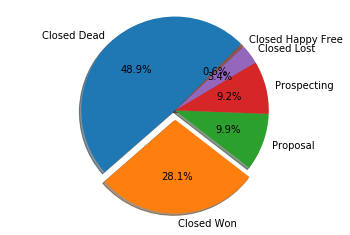

In [265]:
labels = 'Closed Dead', 'Closed Won', 'Proposal', 'Prospecting', 'Closed Lost', 'Closed Happy Free'
sizes = [104599, 60081, 21097, 19563, 7251, 1205]
explode = (0, 0.1, 0, 0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

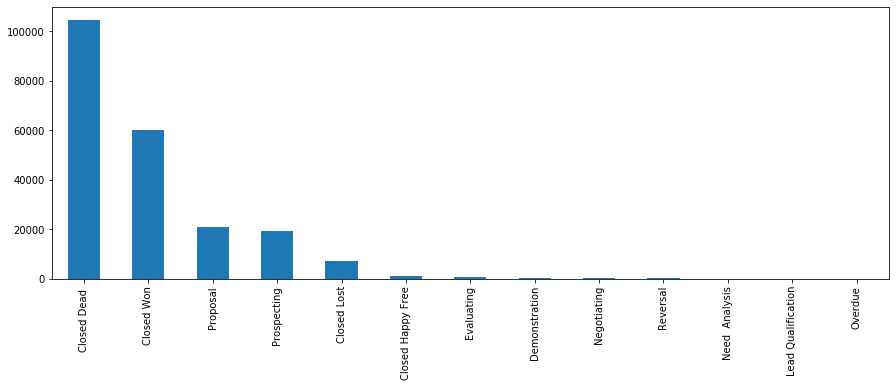

In [73]:
# Plotting the histogram for the OpportunityStageName variable whether how many classses are available

plt.figure(figsize = (15, 5))
data['OpportunityStageName'].value_counts().plot(kind='bar')
plt.show()

### Counting total number of word in corpus

In [74]:
# Creating a function to check the count of words in ecch document or OpportunityStageName

def word_count(conversation):
    
    # making all the words in lower case
    conversation = conversation.lower()
    
    # tokenization
    conversation = word_tokenize(conversation)
    
    # counting the number of words
    conversation = len(conversation)
    return conversation

In [75]:
# Making a new column in the data to store the count number of words of a particular document or OpportunityStageName

data['word_count'] = data['OpportunityStageName'].apply(word_count)

In [76]:
# Print data to check the newly added column and word count

data.head()

,OpportunityId,OpportunityStageName,ActivityDescription,word_count
0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice Dear Sir, Thanks for Order Co...",69
1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed Dear Sir, Please find revised Proform...",33
2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65
3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65
4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...,20


In [77]:
# counting total number of words in corpus

total_words = data['word_count'].sum()
total_words

7677696

### Checking total unique number of words in corpus

In [78]:
# Combinig all the words in a variable named combined_words
combined_words = ' '.join(data['ActivityDescription'])

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words)

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_toked)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus
total_unique_words

72190

### Checking total unique number of words in corpus after lower case

In [79]:
# Combinig all the words in a variable
combined_words = ' '.join(data['ActivityDescription'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_toked)

# Storing the total uniquq number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case
total_unique_words

62388

### Cheking total unique words in corpus after lowercase & stemming / lemmatization

In [80]:
# Initializing WordNetLemmatizer to perform the lemmatization

lemma = WordNetLemmatizer()

In [81]:
# Combinig all the words in a variable
combined_words = ' '.join(data['ActivityDescription'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# lammatization
combined_words_lemmatized = [lemma.lemmatize(word) for word in combined_words_toked]

# Making set of the tokenized words to store the unique words
unique_words = set(combined_words_lemmatized)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case and lemmatization
total_unique_words

61141

### Cheking total unique words in corpus after lowercase, stemming / lemmatization & stopwords removal

In [82]:
# Storing all the stopwords in a variable
stop_words = set(stopwords.words('english')+list(punctuation))

# Printing stopwords
print(stop_words)
print()

# checking total numbers of stopwords
print('total number of stopwords are: ', len(stop_words))

{'its', 'weren', 'if', '.', "haven't", 'are', 'and', 'no', 'between', 'by', 'had', '@', '#', 'y', 'he', 'ours', 'd', 'but', 'i', 'whom', 'didn', 'himself', "you'd", 'yourself', 'itself', "shouldn't", 'more', '*', 'doing', 'who', 'isn', 'into', 'nor', 'haven', '\\', "don't", 'needn', 'his', 'for', 'these', 'their', '-', 'through', 'what', '~', 'hasn', "mightn't", 'so', "you've", 'during', "won't", '!', ';', 'doesn', 'against', "hadn't", ',', '{', 'to', 'shouldn', 'yours', 'it', 'don', 'some', 'such', 'm', 'should', "needn't", 'o', "weren't", '^', "that'll", 'won', 'other', "doesn't", 'does', 'myself', 'those', 'then', 'a', 'now', 'll', 'about', "couldn't", 'an', 'hadn', '"', 'above', "aren't", 'she', 'when', 'have', 'were', 'theirs', 'why', '}', 'very', 'with', 'only', ']', 'because', 'the', 'any', 'until', '<', "hasn't", 'over', 'our', 'been', 'own', 'be', 'how', 'wasn', 'out', '%', 'your', "wasn't", 'there', 'has', 'just', '?', "should've", 'is', 'yourselves', '=', 'wouldn', '&', 'mus

In [83]:
# Combinig all the words in a variable
combined_words = ' '.join(data['ActivityDescription'])

# Converting the words in lower case
combined_words_lr = combined_words.lower()

# Tokenizing all the words
combined_words_toked = word_tokenize(combined_words_lr)

# lammatization
combined_words_lemmatized = [lemma.lemmatize(word) for word in combined_words_toked]

# Removing stopwords
stop_words_removed = [word for word in combined_words_lemmatized if word not in stop_words]

# Making set of the tokenized words to store the unique words
unique_words = set(stop_words_removed)

# Storing the total unique number of words
total_unique_words = len(unique_words)

# Printing total unique number of words in corpus after lower case and lemmatization
total_unique_words

60973

### Normalizing the SentimentText column with creating a new column in the dataset

In [84]:
# Creating a function that normalize our data by removing some unusual words
def normalizer(conversation):
    # Lower case the tweet
    conversation = conversation.lower()
    
    # Substitute mentions
    conversation = re.sub('@\w+', '__mention__', conversation)
    
    # Substitute hashtags
    conversation = re.sub('#\w+', '__hashtag__', conversation)
    
    # Substitute dates
    conversation = re.sub('\d\d\/\d\d\/\d\d\d\d', '__date__', conversation)
    
    # Substitute links
    conversation = re.sub('http.*|https.*|t.co\/.*', '__link__', conversation)
    
    # Substitute numbers
    conversation = re.sub('^\d+\s|\s\d+$|\s\d+\s', '__number__', conversation)
    
    return conversation

In [85]:
# Creating a new column and store the normalize text in it by applying the above created function(normalizer)

data['norm_text'] = data['ActivityDescription'].apply(normalizer)

In [86]:
# Checking newly create column

data

,OpportunityId,OpportunityStageName,ActivityDescription,word_count,norm_text
0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice Dear Sir, Thanks for Order Co...",69,"__hashtag__ dear sir, thanks for order confirm..."
1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed Dear Sir, Please find revised Proform...",33,"__hashtag__ dear sir, please find revised prof..."
2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65,"__hashtag__ dear ma'am, greetings !!! with ref..."
3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65,"__hashtag__ dear ma'am, greetings !!! with ref..."
4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...,20,__hashtag__ up called on landline number discu...
5,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...,20,__hashtag__ up called on landline number discu...
6,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants...",52,"__hashtag__ spoke with rakesh, said he wants t..."
7,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants...",52,"__hashtag__ spoke with rakesh, said he wants t..."
8,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today,8,__hashtag__ -rearranged the demo at 4.00pm today
9,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today,8,__hashtag__ -rearranged the demo at 4.00pm today


We can see above in the data and assume that our new normalized column has been created

### Creating a new column that store the hashtag words use for all the classes in the data of target variable

In [87]:
# Creating a function that filter the hashtag words used in the tweets
def extract_hashtag(conversation):
    
    # filtering all the hashtag words
    conversation = " ".join(filter(lambda x: x[0]== '#', conversation.split()))
    
    # substituting the all excluding alphabets
    conversation = re.sub('[^a-zA-Z]',' ',  conversation)
    
    # converting to the lower case
    conversation = conversation.lower()
    
    # lemmatization
    conversation = [lemma.lemmatize(word) for word in conversation]
    
    # joing alphabets
    conversation = "".join(conversation)
    
    
    return conversation

In [88]:
# Creating a new column to store the hashtag words

data['hashtag'] = data['ActivityDescription'].apply(extract_hashtag)

In [89]:
# Checking the newly created column

data

,OpportunityId,OpportunityStageName,ActivityDescription,word_count,norm_text,hashtag
0,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#ProformaInvoice Dear Sir, Thanks for Order Co...",69,"__hashtag__ dear sir, thanks for order confirm...",proformainvoice
1,0006255A-A476-4DEF-9C67-0E4B0A83ACD0,Closed Won,"#Emailed Dear Sir, Please find revised Proform...",33,"__hashtag__ dear sir, please find revised prof...",emailed
2,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65,"__hashtag__ dear ma'am, greetings !!! with ref...",proposal
3,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,"#Proposal Dear Ma'am, Greetings !!! With refer...",65,"__hashtag__ dear ma'am, greetings !!! with ref...",proposal
4,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...,20,__hashtag__ up called on landline number discu...,follow
5,000992B7-C04E-464A-A010-A2F3F9DCEF8B,Proposal,#Follow up Called on landline number discussed...,20,__hashtag__ up called on landline number discu...,follow
6,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants...",52,"__hashtag__ spoke with rakesh, said he wants t...",demoarranged
7,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,"#DemoArranged Spoke with Rakesh, said he wants...",52,"__hashtag__ spoke with rakesh, said he wants t...",demoarranged
8,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today,8,__hashtag__ -rearranged the demo at 4.00pm today,followup
9,00099CB6-D6A0-460E-85C1-96013DE68CA9,Closed Dead,#FollowUp -Rearranged the demo at 4.00pm Today,8,__hashtag__ -rearranged the demo at 4.00pm today,followup


In [105]:
# converting the all classes of the target variable in the number form that will be suitable for running the ML algorithms

data['OpportunityStageName'] = pd.factorize(data['OpportunityStageName'])[0] + 1

In [49]:
# displaying all the classes converted into the number form

data['OpportunityStageName'].value_counts()

3     104599
1      60081
2      21097
5      19563
7       7251
8       1205
4        763
9        451
10       339
6        223
11        36
13        21
12         7
Name: OpportunityStageName, dtype: int64

### Ploting the word cloud to see mostly used words in all classes of the OpportunityStageName variable 

In [109]:
# Storing all the words in a variable total_words

total_words = ' '.join(data['norm_text'])

In [110]:
# Storing words in Closed Won class of OpportunityStageName column in a Closed_Won variable 

Closed_Won = ' '.join(data[data['OpportunityStageName'] == 1]['norm_text'])

In [111]:
# Storing words in Closed Won class of OpportunityStageName column in a Proposal variable

Proposal = ' '.join(data[data['OpportunityStageName'] == 2]['norm_text'])

In [112]:
# Storing words in Closed Won class of OpportunityStageName column in a Closed_Dead variable 

Closed_Dead = ' '.join(data[data['OpportunityStageName'] == 3]['norm_text'])

In [113]:
# Storing words in Closed Won class of OpportunityStageName column in a Evaluating variable

Evaluating = ' '.join(data[data['OpportunityStageName'] == 4]['norm_text'])

In [114]:
# Storing words in Closed Won class of OpportunityStageName column in a Prospecting variable

Prospecting = ' '.join(data[data['OpportunityStageName'] == 5]['norm_text'])

In [115]:
# Storing words in Closed Won class of OpportunityStageName column in a Reversal variable

Reversal = ' '.join(data[data['OpportunityStageName'] == 6]['norm_text'])

In [116]:
# Storing words in Closed Won class of OpportunityStageName column in a Closed_Lost variable

Closed_Lost = ' '.join(data[data['OpportunityStageName'] == 7]['norm_text'])

In [117]:
# Storing words in Closed Won class of OpportunityStageName column in a Closed_Happy_Free variable

Closed_Happy_Free = ' '.join(data[data['OpportunityStageName'] == 8]['norm_text'])

In [118]:
# Storing words in Closed Won class of OpportunityStageName column in a Demonstration variable

Demonstration = ' '.join(data[data['OpportunityStageName'] == 9]['norm_text'])

In [119]:
# Storing words in Closed Won class of OpportunityStageName column in a Negotiating variable

Negotiating = ' '.join(data[data['OpportunityStageName'] == 10]['norm_text'])

In [120]:
# Storing words in Closed Won class of OpportunityStageName column in a Need_Analysis variable

Need_Analysis = ' '.join(data[data['OpportunityStageName'] == 11]['norm_text'])

In [121]:
# Storing words in Closed Won class of OpportunityStageName column in a Overdue variable

Overdue = ' '.join(data[data['OpportunityStageName'] == 12]['norm_text'])

In [122]:
# Storing words in Closed Won class of OpportunityStageName column in a Lead_Qualification variable

Lead_Qualification = ' '.join(data[data['OpportunityStageName'] == 13]['norm_text'])

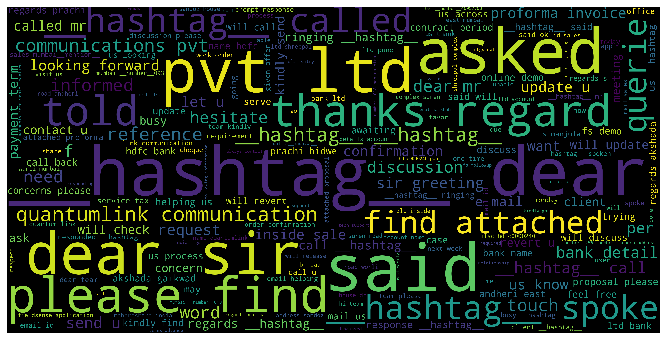

In [92]:
# Ploting cloud words for all conversation words

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(total_words)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

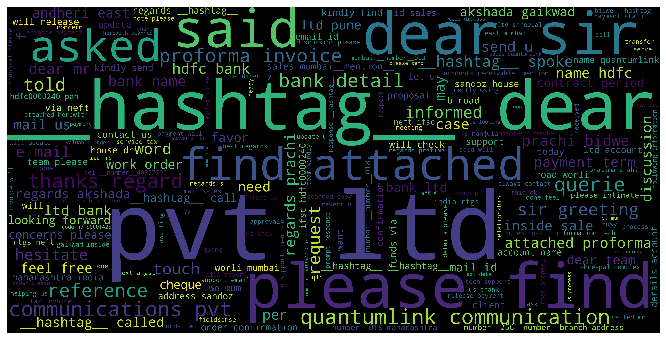

In [123]:
# Ploting words containg Closed_Won convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Closed_Won)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

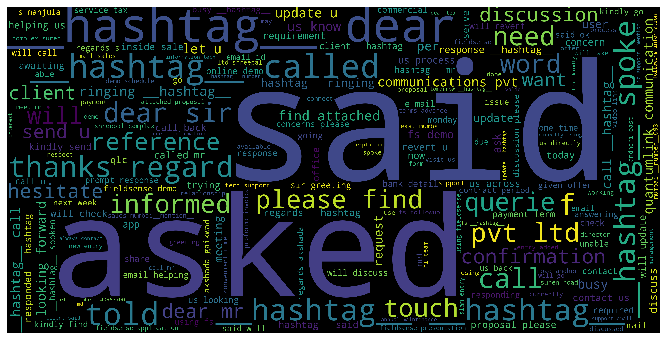

In [124]:
# Ploting words containg Closed_Dead convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Closed_Dead)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

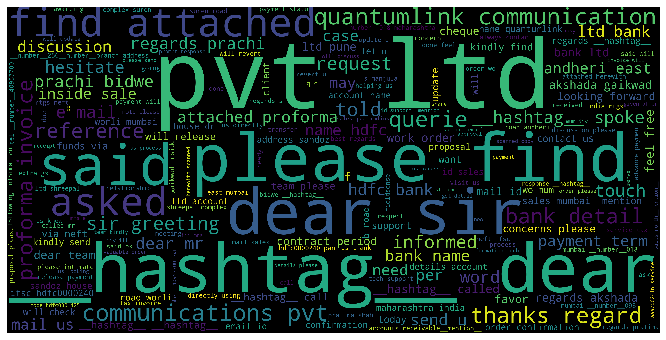

In [108]:
# Ploting words containg Closed_Won convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Closed_Won)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

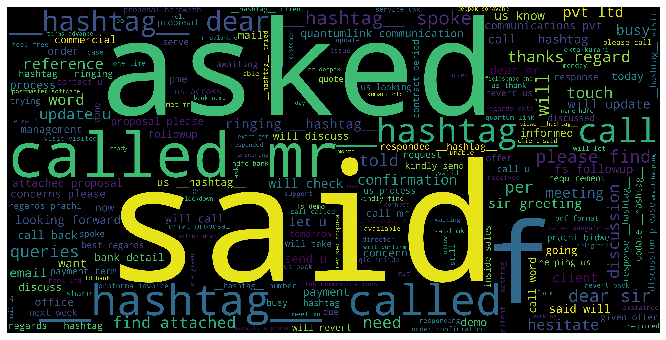

In [125]:
# Ploting words containg Proposal convertationets

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Proposal)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

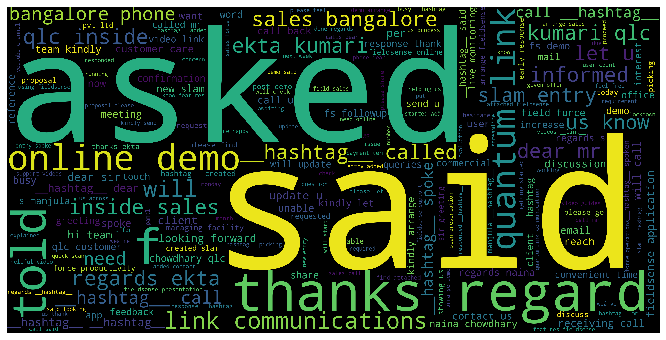

In [126]:
# Ploting words containg Prospecting convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Prospecting)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

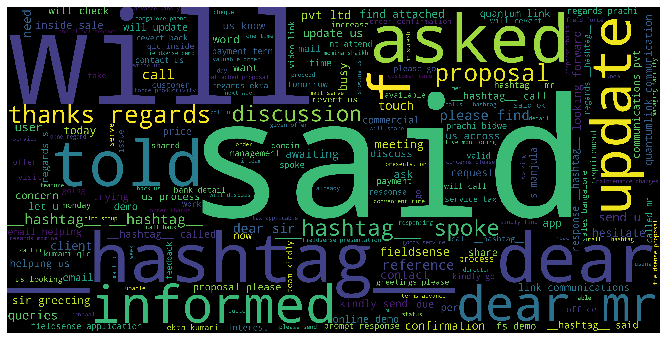

In [127]:
# Ploting words containg Closed_Lost convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Closed_Lost)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

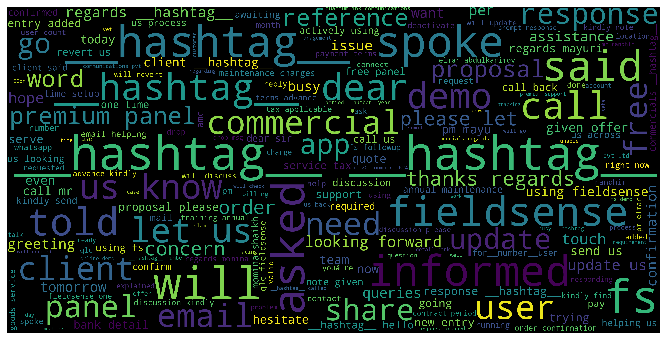

In [128]:
# Ploting words containg Closed_Happy_Free convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Closed_Happy_Free)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

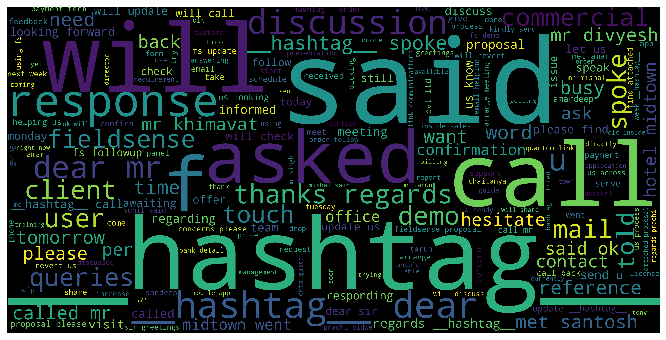

In [129]:
# Ploting words containg Evaluating convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Evaluating)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

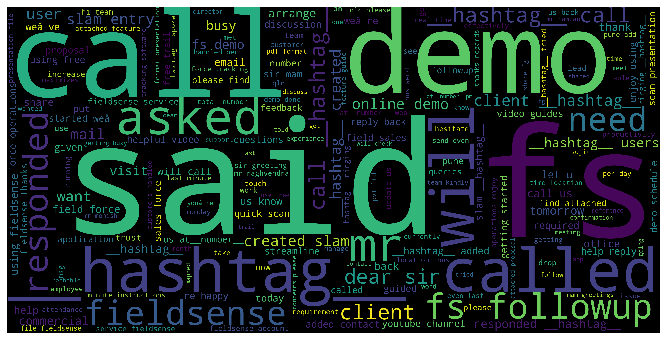

In [130]:
# Ploting words containg Demonstration convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Demonstration)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

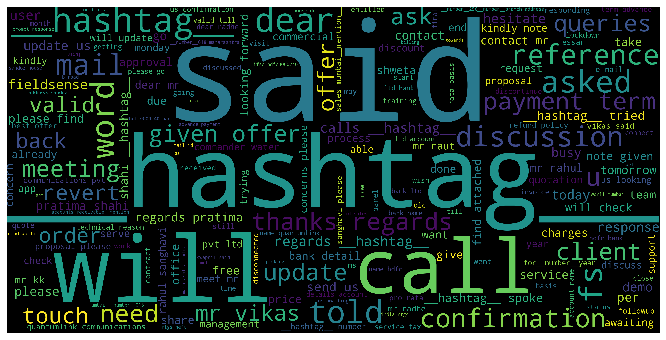

In [131]:
# Ploting words containg Negotiating convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Negotiating)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

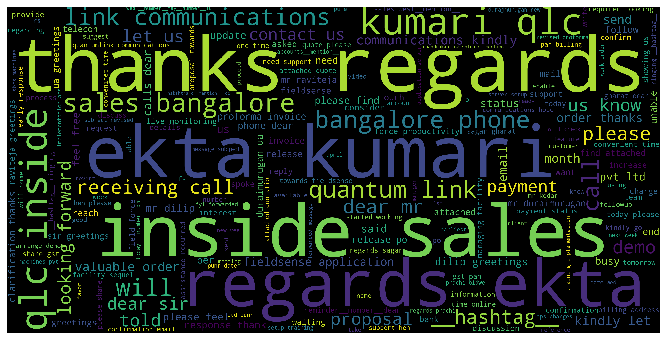

In [132]:
# Ploting words containg Reversal convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Reversal)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

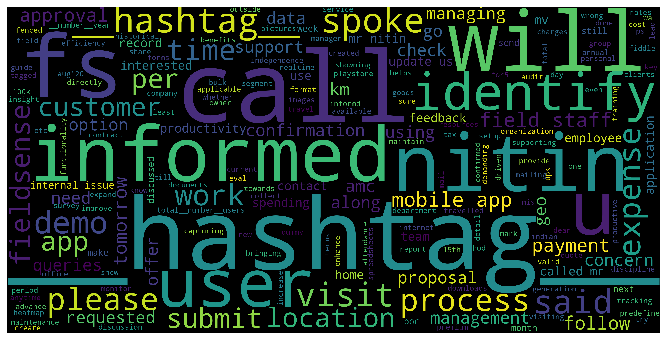

In [133]:
# Ploting words containg Need_Analysis convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Need_Analysis)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

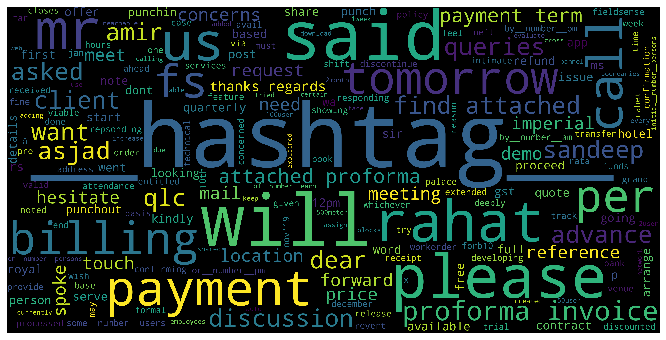

In [134]:
# Ploting words containg Lead_Qualification convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Lead_Qualification)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

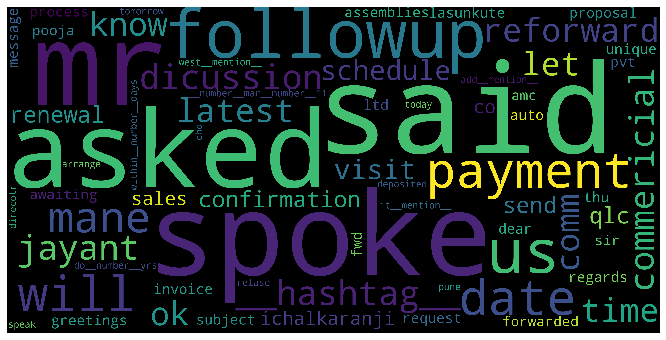

In [135]:
# Ploting words containg Overdue convertation

wordcloud = WordCloud(height=2000, width=4000, stopwords=STOPWORDS)
wordcloud = wordcloud.generate(Overdue)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

With the help of cloud word plot we can check which words are mostly used in which sentiment

In [138]:
# Cheking the most common hashtag word used in all convertation

hashtag_dist_all = FreqDist(list((' '.join(data['hashtag'])).split())).most_common(10)
hashtag_dist_all

[('followup', 39871),
 ('notresponding', 20640),
 ('fscall', 12292),
 ('emailsent', 10026),
 ('fs', 6233),
 ('pme', 3633),
 ('ms', 3357),
 ('proposalsent', 2969),
 ('callback', 2632),
 ('orderfollowup', 2314)]

In [141]:
# Cheking the most common hashtag word used in closed won convertation

hashtag_dist_cw = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 1]['hashtag'])).split())).most_common(10)
hashtag_dist_cw

[('followup', 11379),
 ('emailsent', 3543),
 ('notresponding', 2435),
 ('ms', 2060),
 ('fscall', 2053),
 ('amc', 1265),
 ('fs', 1123),
 ('proposalsent', 978),
 ('pme', 937),
 ('internalcoordination', 798)]

In [203]:
# Cheking the most common hashtag word used in proposal convertation

hashtag_dist_prop = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 2]['hashtag'])).split())).most_common(10)
hashtag_dist_prop

[('followup', 4221),
 ('pme', 1848),
 ('fscall', 1593),
 ('notresponding', 1575),
 ('follow', 729),
 ('ms', 648),
 ('fs', 586),
 ('emailsent', 551),
 ('proposalsent', 344),
 ('mv', 228)]

In [204]:
# Cheking the most common hashtag word used in closed dead convertation

hashtag_dist_cd = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 3]['hashtag'])).split())).most_common(10)
hashtag_dist_cd

[('followup', 19649),
 ('notresponding', 14301),
 ('fscall', 7412),
 ('emailsent', 4844),
 ('fs', 2725),
 ('callback', 1913),
 ('notinterested', 1493),
 ('slamentry', 1323),
 ('orderfollowup', 1312),
 ('proposalsent', 1305)]

In [205]:
# Cheking the most common hashtag word used in evaluation convertation

hashtag_dist_eval = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 4]['hashtag'])).split())).most_common(10)
hashtag_dist_eval

[('followup', 179),
 ('notresponding', 81),
 ('mv', 36),
 ('fieldsense', 28),
 ('fs', 23),
 ('emailsent', 17),
 ('pme', 10),
 ('callback', 10),
 ('proposalsent', 7),
 ('follow', 7)]

In [206]:
# Cheking the most common hashtag word used in prospective convertation

hashtag_dist_prospec = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 5]['hashtag'])).split())).most_common(10)
hashtag_dist_prospec

[('followup', 2428),
 ('fs', 1464),
 ('notresponding', 1193),
 ('fscall', 1057),
 ('slamentry', 599),
 ('emailsent', 463),
 ('not', 328),
 ('callback', 193),
 ('dear', 185),
 ('orderfollowup', 175)]

In [207]:
# Cheking the most common hashtag word used in reversal convertation

hashtag_dist_reversal = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 6]['hashtag'])).split())).most_common(10)
hashtag_dist_reversal

[('followup', 6),
 ('pme', 5),
 ('dear', 4),
 ('fieldsense', 4),
 ('emailreply', 3),
 ('ms', 3),
 ('fs', 2),
 ('addednewcustomer', 2),
 ('notresponding', 2),
 ('emailsent', 2)]

In [208]:
# Cheking the most common hashtag word used in closed lost

hashtag_dist_cl = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 7]['hashtag'])).split())).most_common(10)
hashtag_dist_cl

[('followup', 1450),
 ('notresponding', 693),
 ('emailsent', 457),
 ('orderfollowup', 196),
 ('ms', 191),
 ('fs', 184),
 ('proposalsent', 183),
 ('upgrade', 80),
 ('callback', 77),
 ('firstcontactestablished', 74)]

In [209]:
# Cheking the most common hashtag word used in closed happy free convertation

hashtag_dist_clohapfree = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 8]['hashtag'])).split())).most_common(10)
hashtag_dist_clohapfree

[('followup', 384),
 ('notresponding', 319),
 ('emailsent', 83),
 ('chat', 63),
 ('proposalsent', 26),
 ('callback', 16),
 ('notrequired', 9),
 ('firstcontactestablished', 8),
 ('demoarranged', 7),
 ('internalcoordination', 6)]

In [210]:
# Cheking the most common hashtag word used in demonstration conversation

hashtag_dist_demonst = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 9]['hashtag'])).split())).most_common(10)
hashtag_dist_demonst

[('fscall', 153),
 ('fs', 97),
 ('slamentry', 47),
 ('call', 29),
 ('followup', 29),
 ('emailsent', 7),
 ('fieldsense', 4),
 ('spoke', 3),
 ('fsemail', 2),
 ('dear', 2)]

In [211]:
# Cheking the most common hashtag word used in nagotiating convertation

hashtag_dist_negotiat = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 10]['hashtag'])).split())).most_common(10)
hashtag_dist_negotiat

[('followup', 127),
 ('emailsent', 55),
 ('noresponse', 33),
 ('notresponding', 32),
 ('fs', 23),
 ('muthu', 8),
 ('callback', 8),
 ('follow', 4),
 ('proposalsent', 4),
 ('firstcontactestablished', 3)]

In [213]:
# Cheking the most common hashtag word used in need analysis convertation

hashtag_dist_NeedAna = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 11]['hashtag'])).split())).most_common(10)
hashtag_dist_NeedAna

[('followup', 10),
 ('notresponding', 8),
 ('proposalsent', 2),
 ('norequirement', 2),
 ('norequriement', 2),
 ('mv', 1),
 ('rnwl', 1)]

In [214]:
# Cheking the most common hashtag word used in overdue convertation

hashtag_dist_overdue = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 12]['hashtag'])).split())).most_common(10)
hashtag_dist_overdue

[('called', 3)]

In [215]:
# Cheking the most common hashtag word used in lead qualification

hashtag_dist_LeadQuali = FreqDist(list((' '.join(data[data['OpportunityStageName'] == 13]['hashtag'])).split())).most_common(10)
hashtag_dist_LeadQuali

[('followup', 9),
 ('emailsent', 4),
 ('addednewcustomer', 1),
 ('firstcontactestablished', 1),
 ('proformainvoice', 1),
 ('woman', 1),
 ('fixed', 1),
 ('notresponding', 1),
 ('notinterested', 1),
 ('notresponded', 1)]

with these hashtag words we can analysis easily which hashtag belongs to which sentiment

#### Ploting the hashtag frequency distribution for all OpportunityStageName classes

### ploting frequency distribution for all hashtags

In [216]:
hashtag_dist_all = pd.DataFrame(hashtag_dist_all, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

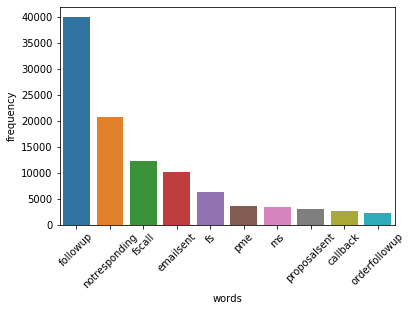

In [217]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_all)
plt.xticks(rotation = 45)

### ploting frequency distribution for closed won hashtags

In [218]:
hashtag_dist_cw = pd.DataFrame(hashtag_dist_cw, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

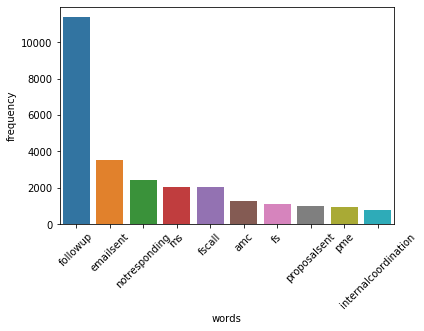

In [219]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_cw)
plt.xticks(rotation = 45)

### ploting frequency distribution for proposal class hashtags

In [220]:
hashtag_dist_prop = pd.DataFrame(hashtag_dist_prop, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

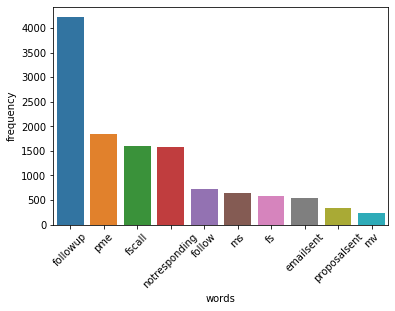

In [221]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_prop)
plt.xticks(rotation = 45)

### ploting frequency distribution for closed dead class hashtags

In [222]:
hashtag_dist_cd = pd.DataFrame(hashtag_dist_cd, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

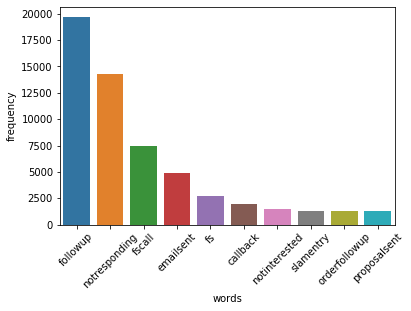

In [223]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_cd)
plt.xticks(rotation = 45)

### ploting frequency distribution for evaluatino class hashtags

In [224]:
hashtag_dist_eval = pd.DataFrame(hashtag_dist_eval, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

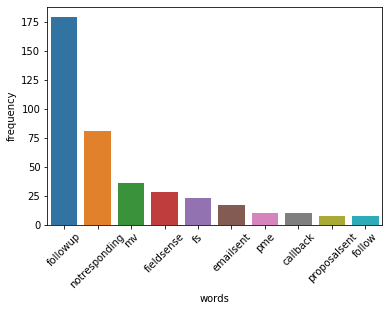

In [225]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_eval)
plt.xticks(rotation = 45)

### ploting frequency distribution for prospectation class hashtags

In [228]:
hashtag_dist_prospec = pd.DataFrame(hashtag_dist_prospec, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

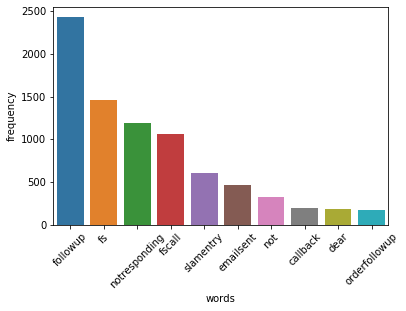

In [229]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_prospec)
plt.xticks(rotation = 45)

### ploting frequency distribution for reversal class hashtags

In [230]:
hashtag_dist_reversal = pd.DataFrame(hashtag_dist_reversal, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

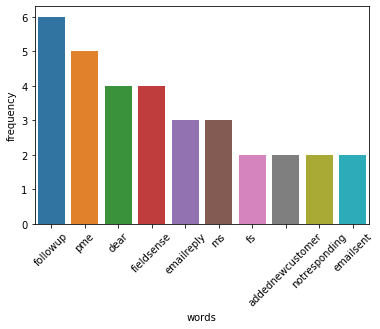

In [231]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_reversal)
plt.xticks(rotation = 45)

### ploting frequency distribution for closed loss class hashtags

In [232]:
hashtag_dist_cl = pd.DataFrame(hashtag_dist_cl, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

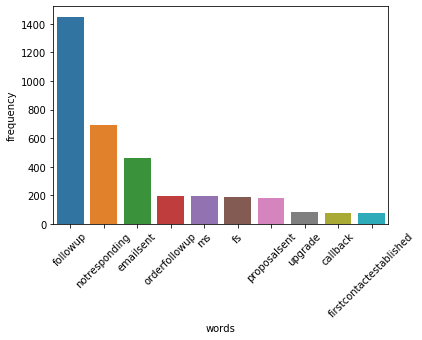

In [233]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_cl)
plt.xticks(rotation = 45)

### ploting frequency distribution for closed happy free class hashtags

In [234]:
hashtag_dist_clohapfree = pd.DataFrame(hashtag_dist_clohapfree, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

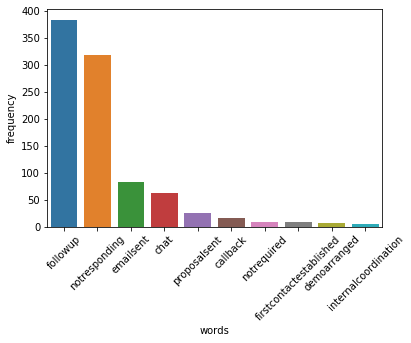

In [235]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_clohapfree)
plt.xticks(rotation = 45)

### ploting frequency distribution for demonstration class hashtags

In [236]:
hashtag_dist_demonst = pd.DataFrame(hashtag_dist_demonst, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

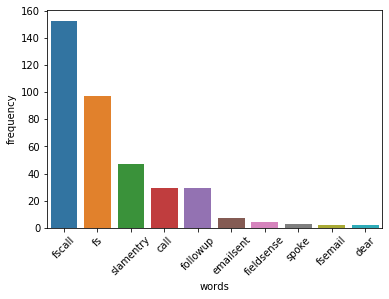

In [237]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_demonst)
plt.xticks(rotation = 45)

### ploting frequency distribution for nagotiation class hashtags

In [238]:
hashtag_dist_negotiat = pd.DataFrame(hashtag_dist_negotiat, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

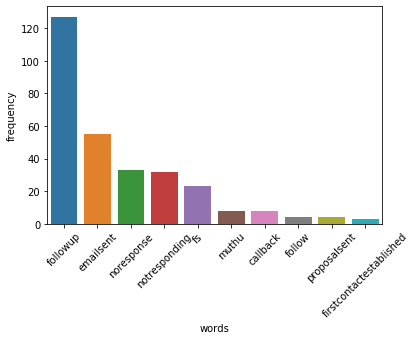

In [239]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_negotiat)
plt.xticks(rotation = 45)

### ploting frequency distribution for need analysis class hashtags

In [240]:
hashtag_dist_NeedAna = pd.DataFrame(hashtag_dist_NeedAna, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

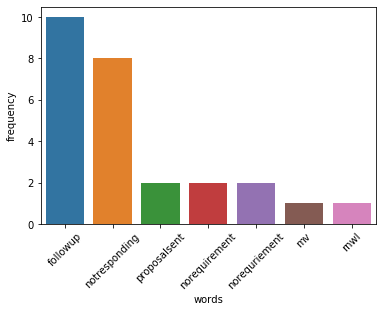

In [241]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_NeedAna)
plt.xticks(rotation = 45)

### ploting frequency distribution for overdue class hashtags

In [242]:
hashtag_dist_overdue = pd.DataFrame(hashtag_dist_overdue, columns = ['words', 'frequency'])

(array([0]), <a list of 1 Text xticklabel objects>)

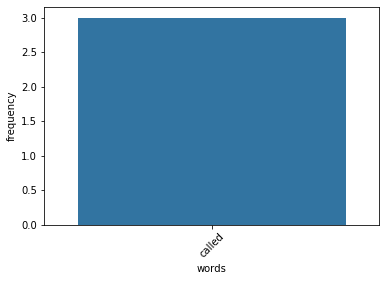

In [243]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_overdue)
plt.xticks(rotation = 45)

### ploting frequency distribution for leas qualification class hashtags

In [244]:
hashtag_dist_LeadQuali = pd.DataFrame(hashtag_dist_LeadQuali, columns = ['words', 'frequency'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

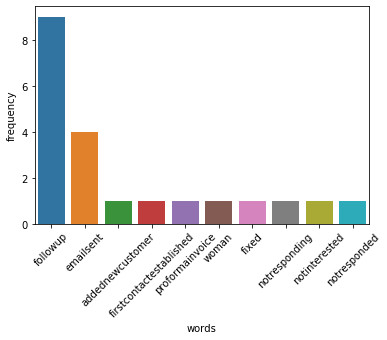

In [245]:
sns.barplot(x = 'words', y = 'frequency', data = hashtag_dist_LeadQuali)
plt.xticks(rotation = 45)

### Fit and apply Models

In [247]:
# Initializing models

# Initializing LogisticRegression model
lr = LogisticRegression()

# Initializing RandomForestClassifier model
rfc = RandomForestClassifier()

# Initializing VotingClassifier hard model
vot_hard = VotingClassifier([('rf', rfc), ('lr', lr)], voting='hard')

# Initializing VotingClassifier soft model
vot_soft = VotingClassifier([('rf', rfc), ('lr', lr)], voting='soft')

#### We are going to check either CountVectorizer gives good performance or TFIDF

In [248]:
# Initializing Vectorizers

cv = CountVectorizer(ngram_range=(1, 3))
tfidf = CountVectorizer(ngram_range=(1, 3))

### Applying models with TFIDF

In [251]:
# Creating X & y

X = data['norm_text']
y = data['OpportunityStageName']

# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Fit and transform vectors for X_train

tfidf_train = tfidf.fit_transform(X_train)

# Transform X_test to vectors

tfidf_X_test = tfidf.transform(X_test)

# Fit and predict

print('Random Forest Results')
print('---------------------')
rfc.fit(tfidf_train, y_train)
y_pred = rfc.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Logistic Regression Results')
print('---------------------')
lr.fit(tfidf_train, y_train)
y_pred = lr.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Hard Results')
print('---------------------')
vot_hard.fit(tfidf_train, y_train)
y_pred = vot_hard.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Soft Results')
print('---------------------')
vot_soft.fit(tfidf_train, y_train)
y_pred = vot_soft.predict(tfidf_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### Applying models with Count Vectorizer

In [ ]:
# Creating X & y

X = data['norm_text']
y = data['OpportunityStageName']

# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Fit and transform vectors for X_train

cv_train = cv.fit_transform(X_train)

# Transform X_test to vectors

cv_X_test = cv.transform(X_test)

# Fit and predict

print('Random Forest Results')
print('---------------------')
rfc.fit(cv_train, y_train)
y_pred = rfc.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Logistic Regression Results')
print('---------------------')
lr.fit(cv_train, y_train)
y_pred = lr.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Hard Results')
print('---------------------')
vot_hard.fit(cv_train, y_train)
y_pred = vot_hard.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print()

print('Voting Classifier Soft Results')
print('---------------------')
vot_soft.fit(cv_train, y_train)
y_pred = vot_soft.predict(cv_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

As for the above applied model we can see that CountVectorizer has given better accuracy than CountVectorizer TFIDF vectorizer

### Model Performance

Text(0.5,1,'Scores of Models')

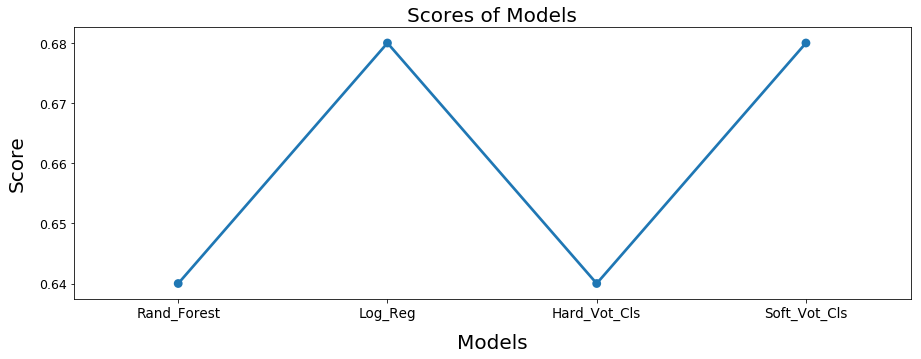

In [54]:
# Plot the model performance with the line plot

plt.figure(figsize = (15, 5))
sns.pointplot(x = ['Rand_Forest', 'Log_Reg', 'Hard_Vot_Cls', 'Soft_Vot_Cls'], y = [0.64, 0.68, 0.64, 0.68], markers=['o'], linestyles=['-'])
plt.ylabel('Score', size=20, labelpad=12.5)
plt.xlabel('Models', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)
plt.title('Scores of Models', size=20)

# ----------------------------------------------Thank  You------------------------------------------------